![header](../figures/logos_partenaires._cmems_se.jpg)


<div class="alert alert-block alert-success">
<h1><center> Read and plot Gulf Stream SWOT data at one specific date </center></h1>
<h2><center>For 1 day orbit data </center></h2></div>

***
**Authors:**  Datlas, IGE, IMEDEA & CLS <br>
**Copyright:** 2022 Datlas, IGE, IMEDEA & CLS <br>
**License:** MIT

In [1]:
import os
import glob
import sys
sys.path.append('..')
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt


from src import mod_plot
from src import mod_switchvar
from src.dict_regions_info import *

In [2]:

region_info = RegionInfo('GS_info').region_info   # Region dictionary info from dict_regions_info.py

method = 'Gomez_v1'   # Name for plots title and saving figures

name_denoised = 'ssha_gomezfilt' # Name of the denoised SWOT variable in the xarray file 

## Read from regional data file "../swot_data/swot_1j_share_'region'.nc"

In [3]:
path_data = '../denoised_data/swot_1j_share_GS_gomezfilt.nc'
 
date_plot = np.datetime64('2023-04-23')

orbit = '1d'

In [4]:
ds_SWOT = xr.open_mfdataset(path_data) 

## Plot noisy and baseline denoised SSH

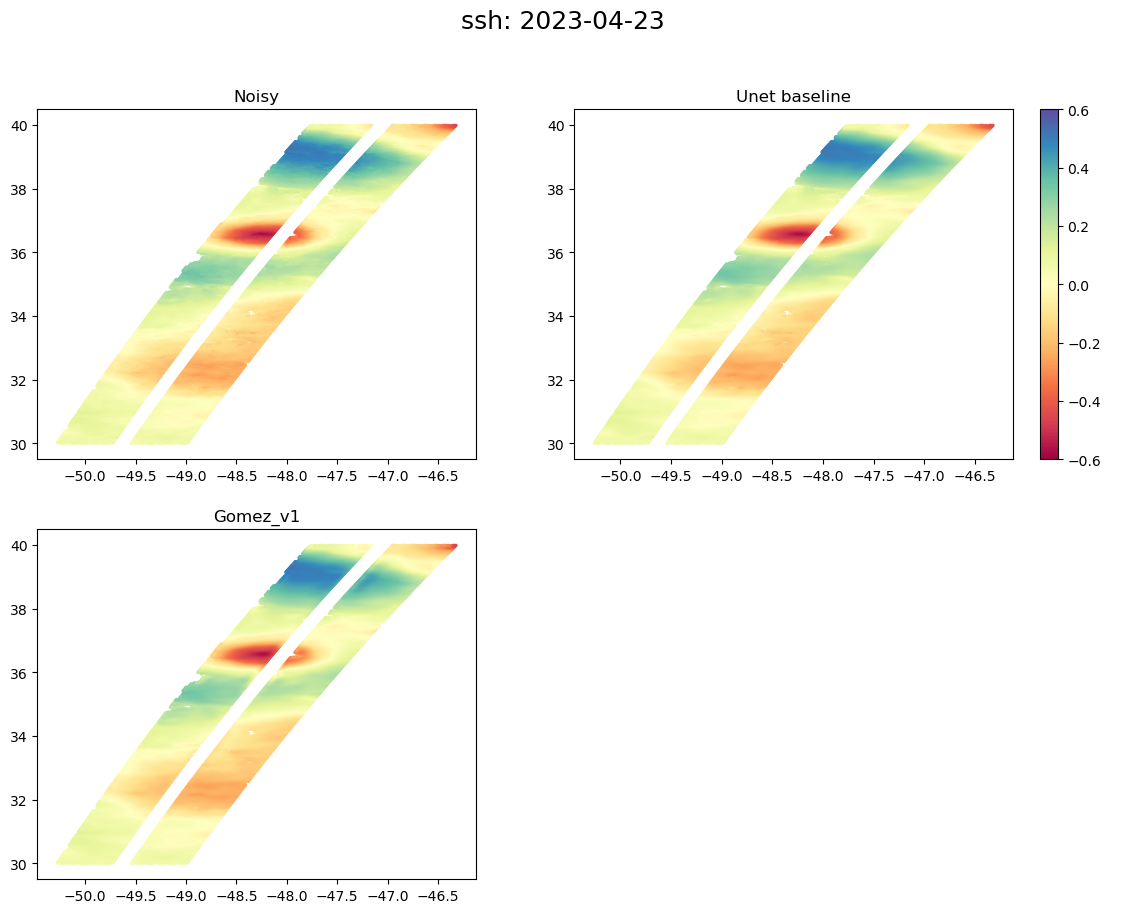

In [5]:
 
mod_plot.plot_compare_snapshots(ds_SWOT, methods=['Noisy','Unet baseline','Gomez_v1'], var_type='ssh', name_var=['ssha_new_editing','ssha_denoised_unet','ssha_gomezfilt'], date_plot=date_plot, region_info=region_info, method=method, orbit = orbit, colsize = 14)


## Compute and plot SSH gradients and Laplacian

In [9]:
grad_new_editing, lapl_new_editing = mod_switchvar.deriv1and2(ds_SWOT.ssha_new_editing)
grad_denoised_unet, lapl_denoised_unet = mod_switchvar.deriv1and2(ds_SWOT.ssha_denoised_unet)
grad_gomezfilt, lapl_gomezfilt = mod_switchvar.deriv1and2(ds_SWOT.ssha_gomezfilt)

ds_SWOT = ds_SWOT.assign(grad_new_editing=lambda ds_SWOT: ds_SWOT.ssha_new_editing * 0 + grad_new_editing)
ds_SWOT = ds_SWOT.assign(grad_denoised_unet=lambda ds_SWOT: ds_SWOT.ssha_denoised_unet * 0 + grad_denoised_unet)
ds_SWOT = ds_SWOT.assign(grad_gomezfilt=lambda ds_SWOT: ds_SWOT.ssha_gomezfilt * 0 + grad_gomezfilt)


ds_SWOT = ds_SWOT.assign(lapl_new_editing=lambda ds_SWOT: ds_SWOT.ssha_new_editing * 0 + lapl_new_editing)
ds_SWOT = ds_SWOT.assign(lapl_denoised_unet=lambda ds_SWOT: ds_SWOT.ssha_denoised_unet * 0 + lapl_denoised_unet)
ds_SWOT = ds_SWOT.assign(lapl_gomezfilt=lambda ds_SWOT: ds_SWOT.ssha_gomezfilt * 0 + lapl_gomezfilt)


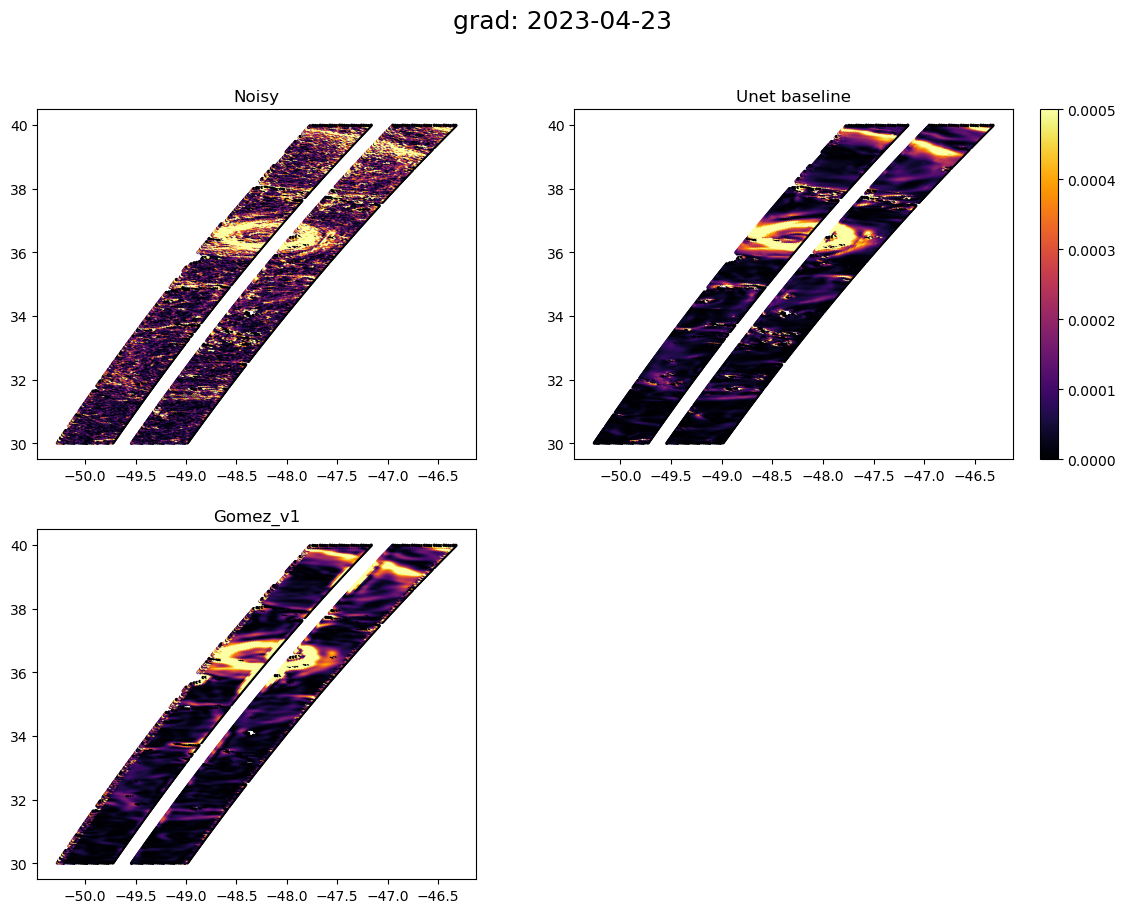

In [10]:
  
mod_plot.plot_compare_snapshots(ds_SWOT, methods=['Noisy','Unet baseline','Gomez_v1'], var_type='grad', name_var=['grad_new_editing','grad_denoised_unet','grad_gomezfilt'], date_plot=date_plot, region_info=region_info, method=method, orbit = orbit, colsize = 14)
 

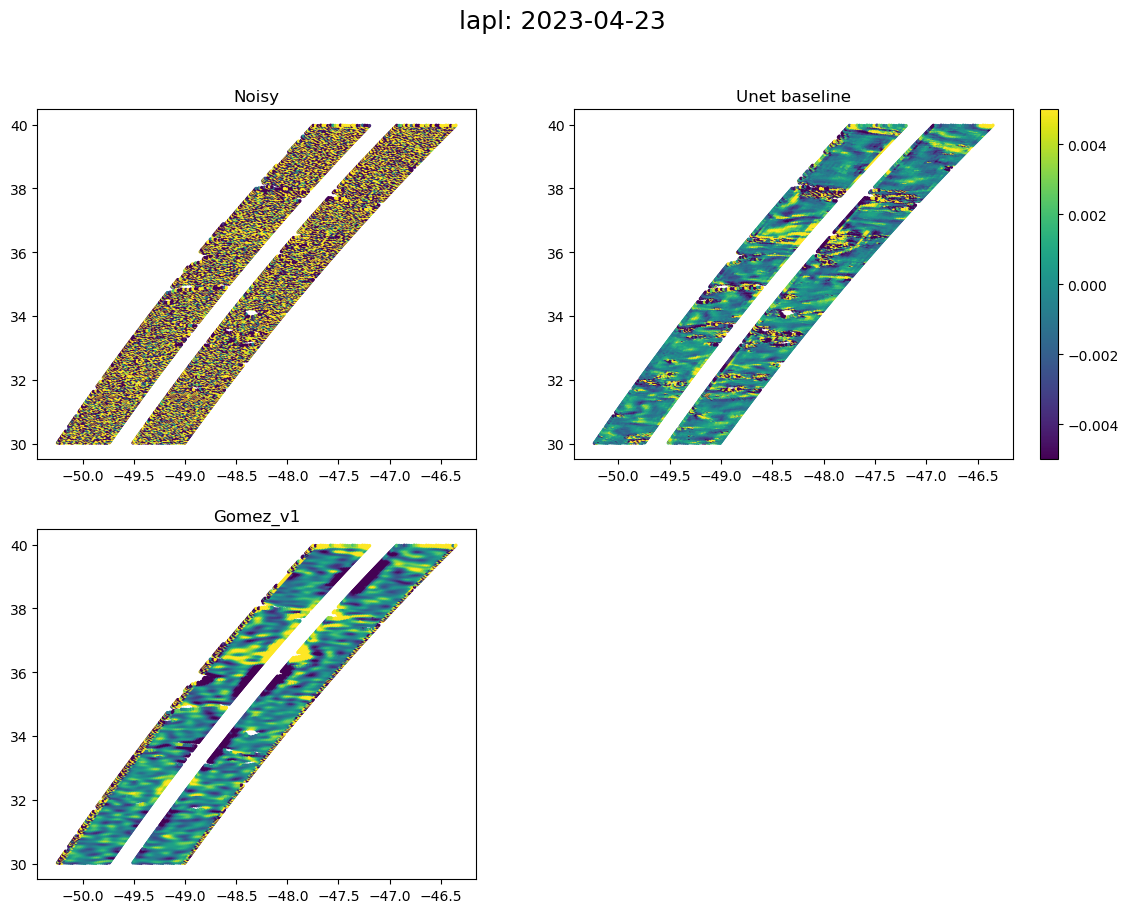

In [11]:
  
mod_plot.plot_compare_snapshots(ds_SWOT, methods=['Noisy','Unet baseline','Gomez_v1'], var_type='lapl', name_var=['lapl_new_editing','lapl_denoised_unet','lapl_gomezfilt'], date_plot=date_plot, region_info=region_info, method=method, orbit = orbit, colsize = 14)
 